In [10]:
#Resources:
#https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/multilayer_perceptron.py
#https://www.tensorflow.org/versions/r1.2/get_started/mnist/pros

import os
import sys
import numpy as np
src_path = os.getcwd().split('/')
src_path = '/'.join(src_path[:src_path.index('')+1])
sys.path.append(src_path)

import tensorflow as tf
sess = tf.InteractiveSession()

from numpy import genfromtxt
my_data = genfromtxt('../data/raw/mnist.csv', delimiter=',', dtype = np.float32)

In [73]:
import datetime

In [58]:
def one_hot_encode(y_original):
    y_encoded = np.array(np.zeros((y_original.shape[0], 10)))
    
    i = 0
    for num in y_original:
        y_encoded[i][int(num)] = 1
        i = i + 1
        
    return y_encoded

In [67]:
mnist_x = my_data[1:200,1:]
mnist_y = my_data[1:200,:1]

test_mnist_x = my_data[200:800,1:]
test_mnist_y = my_data[200:800,:1]

In [60]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 5
display_step = 1

In [61]:
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [62]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10]) # Should be 10

W = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
b = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [71]:
def multilayer_perceptron(x, W, b):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, W['h1']), b['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, W['h2']), b['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.add(tf.matmul(layer_2, W['out']),b['out'])
    return out_layer

In [72]:
# Construct model
y = multilayer_perceptron(x, W, b)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Initializing the variables
init = tf.global_variables_initializer()


In [74]:
import matplotlib.pyplot as plt
print(datetime.datetime.now())
with tf.Session() as sess:
    sess.run(init)

    accuracies = []
    for i in range(0,len(mnist_x), batch_size):
        x_batch = mnist_x[i:i+batch_size]
        y_batch = mnist_y[i:i+batch_size]
        
#         train_accuracy = accuracy.eval(feed_dict={
#           x: x_batch, y_: y_batch})
#         optimizer.run(feed_dict={x: x_batch, y_: y_batch})
        #Maybe change y_batch so that it is (batch_size, 10) size instead of (batch_size, 1)
        _, c = sess.run([train_op, loss_op], feed_dict={x: x_batch, y_: one_hot_encode(y_batch)})
#         _, c = sess.run([optimizer, loss_op], feed_dict={x: x_batch, y_: one_hot_encode(y_batch)})
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        value = accuracy.eval(feed_dict={x: test_mnist_x, y_: one_hot_encode(test_mnist_y)})
        accuracies.append(value)
        
    # Calculate accuracy
    pred = tf.nn.softmax(y)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    value = accuracy.eval(feed_dict={x: mnist_x, y_: one_hot_encode(mnist_y)})
    print(datetime.datetime.now())
    print('test accuracy %g' % value)

2018-05-30 18:00:39.097332
2018-05-30 18:00:56.181243
test accuracy 0.226131


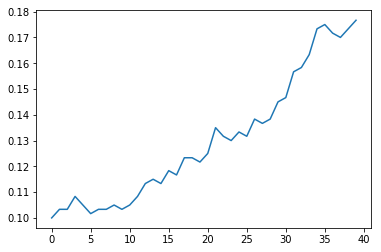

In [75]:
plt.plot(accuracies)